C:\Users\Administrator\AppData\Local\Temp\ipykernel_22760\3799550592.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_meqtl_data['task'] = 'meQTL'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22760\3799550592.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_eqtl_data['task'] = 'eQTL'


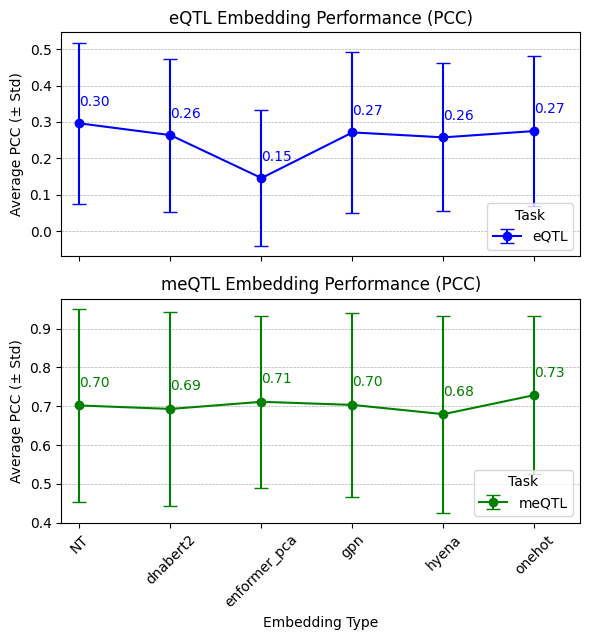

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

eqtl_data = pd.read_csv('eqtl_slope_merged_result.csv')
meqtl_data = pd.read_csv('meqtl_slope_merged_result.csv')

# Filter data where 'shuffled' is 'yes'
filtered_meqtl_data = meqtl_data[meqtl_data['shuffled'] == 'yes']
filtered_eqtl_data = eqtl_data[eqtl_data['shuffled'] == 'yes']

# Add task type to differentiate datasets
filtered_meqtl_data['task'] = 'meQTL'
filtered_eqtl_data['task'] = 'eQTL'

# Combine filtered datasets with PCC included
filtered_combined_data_pcc = pd.concat([
    filtered_meqtl_data[['embedding', 'tissue', 'pcc', 'task']],
    filtered_eqtl_data[['embedding', 'tissue', 'pcc', 'task']]
])

# Aggregate PCC by embedding and task, calculating mean and standard deviation
embedding_performance_stats = (
    filtered_combined_data_pcc.groupby(['task', 'embedding'])
    .agg(mean_pcc=('pcc', 'mean'), std_pcc=('pcc', 'std'))
    .reset_index()
)

# Split data for eQTL and meQTL
eqtl_data = embedding_performance_stats[embedding_performance_stats['task'] == 'eQTL']
meqtl_data = embedding_performance_stats[embedding_performance_stats['task'] == 'meQTL']

# Create a figure for subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 6.5), sharex=True)

# Plot eQTL performance with error bars
axes[0].errorbar(
    eqtl_data['embedding'],
    eqtl_data['mean_pcc'],
    yerr=eqtl_data['std_pcc'],
    label='eQTL',
    fmt='o-',
    capsize=5,
    color='blue',
)
# Annotate points with their values
for i, row in eqtl_data.iterrows():
    axes[0].text(
        row['embedding'], row['mean_pcc']+0.04, f"{row['mean_pcc']:.2f}",
        color='blue', fontsize=10, ha='left', va='bottom'
    )
#axes[0].axhline(0, color='black', linewidth=0.8, linestyle='--')  # Baseline
axes[0].set_title("eQTL Embedding Performance (PCC)")
axes[0].set_ylabel("Average PCC (± Std)")
axes[0].legend(title="Task",loc='lower right')
axes[0].grid(axis='y', linestyle='--', linewidth=0.5)
axes[0].set_xlim(-0.2, 5.5)

# Plot meQTL performance with error bars
axes[1].errorbar(
    meqtl_data['embedding'],
    meqtl_data['mean_pcc'],
    yerr=meqtl_data['std_pcc'],
    label='meQTL',
    fmt='o-',
    capsize=5,
    color='green',
)
# Annotate points with their values
for i, row in meqtl_data.iterrows():
    axes[1].text(
        row['embedding'], row['mean_pcc']+0.04, f"{row['mean_pcc']:.2f}",
        color='green', fontsize=10, ha='left', va='bottom'
    )
#axes[1].axhline(0, color='black', linewidth=0.8, linestyle='--')  # Baseline
axes[1].set_title("meQTL Embedding Performance (PCC)")
axes[1].set_xlabel("Embedding Type")
axes[1].set_ylabel("Average PCC (± Std)")
axes[1].legend(title="Task",loc='lower right')
axes[1].grid(axis='y', linestyle='--', linewidth=0.5)
axes[1].set_xlim(-0.2, 5.5)

# Adjust layout for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22760\1435594799.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_meqtl_data['task'] = 'meQTL'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22760\1435594799.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_eqtl_data['task'] = 'eQTL'


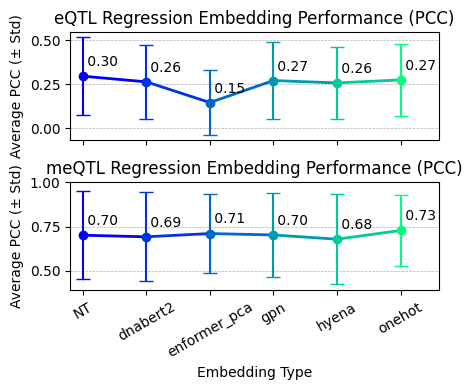

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load data
eqtl_data = pd.read_csv('eqtl_slope_merged_result.csv')
meqtl_data = pd.read_csv('meqtl_slope_merged_result.csv')

# Filter data where 'shuffled' is 'yes'
filtered_meqtl_data = meqtl_data[meqtl_data['shuffled'] == 'yes']
filtered_eqtl_data = eqtl_data[eqtl_data['shuffled'] == 'yes']

# Add task type to differentiate datasets
filtered_meqtl_data['task'] = 'meQTL'
filtered_eqtl_data['task'] = 'eQTL'

# Combine filtered datasets with PCC included
filtered_combined_data_pcc = pd.concat([
    filtered_meqtl_data[['embedding', 'tissue', 'pcc', 'task']],
    filtered_eqtl_data[['embedding', 'tissue', 'pcc', 'task']]
])

# Aggregate PCC by embedding and task, calculating mean and standard deviation
embedding_performance_stats = (
    filtered_combined_data_pcc.groupby(['task', 'embedding'])
    .agg(mean_pcc=('pcc', 'mean'), std_pcc=('pcc', 'std'))
    .reset_index()
)

# Split data for eQTL and meQTL
eqtl_data = embedding_performance_stats[embedding_performance_stats['task'] == 'eQTL']
meqtl_data = embedding_performance_stats[embedding_performance_stats['task'] == 'meQTL']

# Prepare colormap
num_embeddings = len(eqtl_data['embedding'].unique())
cmap = cm.get_cmap('winter', num_embeddings)
norm = mcolors.Normalize(vmin=0, vmax=num_embeddings - 1)

# Create a figure for subplots
fig, axes = plt.subplots(2, 1, figsize=(4.5, 4), sharex=True)

# Plot eQTL performance with gradient colors
for i in range(len(eqtl_data)):
    color = cmap(norm(i))
    # Plot point with error bar
    axes[0].errorbar(
        eqtl_data['embedding'].iloc[i],
        eqtl_data['mean_pcc'].iloc[i],
        yerr=eqtl_data['std_pcc'].iloc[i],
        fmt='o', color=color, capsize=5, label='_nolegend_'
    )
    # Annotate point with its value
    axes[0].text(
        eqtl_data['embedding'].iloc[i],
        eqtl_data['mean_pcc'].iloc[i] + 0.04,  # Add offset
        " " + f"{eqtl_data['mean_pcc'].iloc[i]:.2f}",
        #color=color, fontsize=10, ha='left', va='bottom'
        color='black', fontsize=10, ha='left', va='bottom'
    )
    if i < len(eqtl_data) - 1:
        # Draw connecting line
        axes[0].plot(
            [eqtl_data['embedding'].iloc[i], eqtl_data['embedding'].iloc[i + 1]],
            [eqtl_data['mean_pcc'].iloc[i], eqtl_data['mean_pcc'].iloc[i + 1]],
            color=color, linewidth=2
        )

axes[0].set_title("eQTL Regression Embedding Performance (PCC)")
axes[0].set_ylabel("Average PCC (± Std)")
axes[0].grid(axis='y', linestyle='--', linewidth=0.5)
axes[0].set_xlim(-0.2, 5.5)

# Plot meQTL performance with gradient colors
for i in range(len(meqtl_data)):
    color = cmap(norm(i))
    # Plot point with error bar
    axes[1].errorbar(
        meqtl_data['embedding'].iloc[i],
        meqtl_data['mean_pcc'].iloc[i],
        yerr=meqtl_data['std_pcc'].iloc[i],
        fmt='o', color=color, capsize=5, label='_nolegend_'
    )
    # Annotate point with its value
    axes[1].text(
        meqtl_data['embedding'].iloc[i],
        meqtl_data['mean_pcc'].iloc[i] + 0.04,  # Add offset
        " " + f"{meqtl_data['mean_pcc'].iloc[i]:.2f}",
        #color=color, fontsize=10, ha='left', va='bottom'
        color='black', fontsize=10, ha='left', va='bottom'
    )
    if i < len(meqtl_data) - 1:
        # Draw connecting line
        axes[1].plot(
            [meqtl_data['embedding'].iloc[i], meqtl_data['embedding'].iloc[i + 1]],
            [meqtl_data['mean_pcc'].iloc[i], meqtl_data['mean_pcc'].iloc[i + 1]],
            color=color, linewidth=2
        )

axes[1].set_title("meQTL Regression Embedding Performance (PCC)")
axes[1].set_xlabel("Embedding Type")
axes[1].set_ylabel("Average PCC (± Std)")
axes[1].grid(axis='y', linestyle='--', linewidth=0.5)
axes[1].set_xlim(-0.2, 5.6)
axes[1].set_ylim(0.39, 1)


# Adjust layout for better visibility
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('meqtl-slope-images/slopeall-embedding.png',dpi=300, bbox_inches = 'tight')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22760\662133955.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_meqtl_data['task'] = 'meQTL'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22760\662133955.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_eqtl_data['task'] = 'eQTL'


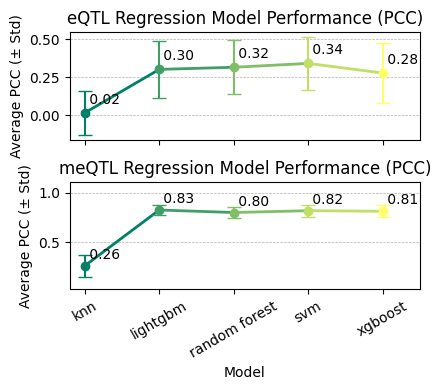

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load data
eqtl_data = pd.read_csv('eqtl_slope_merged_result.csv')
meqtl_data = pd.read_csv('meqtl_slope_merged_result.csv')

# Filter data where 'shuffled' is 'yes'
filtered_meqtl_data = meqtl_data[meqtl_data['shuffled'] == 'yes']
filtered_eqtl_data = eqtl_data[eqtl_data['shuffled'] == 'yes']

# Add task type to differentiate datasets
filtered_meqtl_data['task'] = 'meQTL'
filtered_eqtl_data['task'] = 'eQTL'

# Combine filtered datasets with PCC included
filtered_combined_data_pcc = pd.concat([
    filtered_meqtl_data[['model', 'tissue', 'pcc', 'task']],
    filtered_eqtl_data[['model', 'tissue', 'pcc', 'task']]
])

# Aggregate PCC by model and task, calculating mean and standard deviation
embedding_performance_stats = (
    filtered_combined_data_pcc.groupby(['task', 'model'])
    .agg(mean_pcc=('pcc', 'mean'), std_pcc=('pcc', 'std'))
    .reset_index()
)

# Split data for eQTL and meQTL
eqtl_data = embedding_performance_stats[embedding_performance_stats['task'] == 'eQTL']
meqtl_data = embedding_performance_stats[embedding_performance_stats['task'] == 'meQTL']

# Prepare colormap
num_embeddings = len(eqtl_data['model'].unique())
cmap = cm.get_cmap('summer', num_embeddings)
norm = mcolors.Normalize(vmin=0, vmax=num_embeddings - 1)

# Create a figure for subplots
fig, axes = plt.subplots(2, 1, figsize=(4.4, 4), sharex=True)

# Plot eQTL performance with gradient colors
for i in range(len(eqtl_data)):
    color = cmap(norm(i))
    # Plot point with error bar
    axes[0].errorbar(
        eqtl_data['model'].iloc[i],
        eqtl_data['mean_pcc'].iloc[i],
        yerr=eqtl_data['std_pcc'].iloc[i],
        fmt='o', color=color, capsize=5, label='_nolegend_'
    )
    # Annotate point with its value
    axes[0].text(
        eqtl_data['model'].iloc[i],
        eqtl_data['mean_pcc'].iloc[i] + 0.04,  # Add offset
        " " + f"{eqtl_data['mean_pcc'].iloc[i]:.2f}",
        #color=color, fontsize=10, ha='left', va='bottom'
        color='black', fontsize=10, ha='left', va='bottom'
    )
    if i < len(eqtl_data) - 1:
        # Draw connecting line
        axes[0].plot(
            [eqtl_data['model'].iloc[i], eqtl_data['model'].iloc[i + 1]],
            [eqtl_data['mean_pcc'].iloc[i], eqtl_data['mean_pcc'].iloc[i + 1]],
            color=color, linewidth=2
        )

axes[0].set_title("eQTL Regression Model Performance (PCC)")
axes[0].set_ylabel("Average PCC (± Std)")
axes[0].grid(axis='y', linestyle='--', linewidth=0.5)
axes[0].set_xlim(-0.2, 4.5)

# Plot meQTL performance with gradient colors
for i in range(len(meqtl_data)):
    color = cmap(norm(i))
    # Plot point with error bar
    axes[1].errorbar(
        meqtl_data['model'].iloc[i],
        meqtl_data['mean_pcc'].iloc[i],
        yerr=meqtl_data['std_pcc'].iloc[i],
        fmt='o', color=color, capsize=5, label='_nolegend_'
    )
    # Annotate point with its value
    axes[1].text(
        meqtl_data['model'].iloc[i],
        meqtl_data['mean_pcc'].iloc[i] + 0.04,  # Add offset
        " " + f"{meqtl_data['mean_pcc'].iloc[i]:.2f}",
        #color=color, fontsize=10, ha='left', va='bottom'
        color='black', fontsize=10, ha='left', va='bottom'
    )
    if i < len(meqtl_data) - 1:
        # Draw connecting line
        axes[1].plot(
            [meqtl_data['model'].iloc[i], meqtl_data['model'].iloc[i + 1]],
            [meqtl_data['mean_pcc'].iloc[i], meqtl_data['mean_pcc'].iloc[i + 1]],
            color=color, linewidth=2
        )

axes[1].set_title("meQTL Regression Model Performance (PCC)")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("Average PCC (± Std)")
axes[1].grid(axis='y', linestyle='--', linewidth=0.5)
axes[1].set_xlim(-0.2, 4.5)
axes[1].set_ylim(0.02, 1.11)


# Adjust layout for better visibility
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('meqtl-slope-images/slopeall-model.png',dpi=300, bbox_inches = 'tight')
plt.show()
